Importando as bibliotecas necessárias:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

Definindo as funções necessárias:

In [22]:
def derivadas(vars, t, omega):
    x, y, z, xp, yp, zp = vars
    r = x**2 + y**2 + z**2
    r5 = r**(5/2)

    eq1 = xp
    eq2 = yp
    eq3 = zp
    eq4 = -omega * (yp * (x**2 + y**2 - 2*z**2) + 3*zp*z*y) / r5
    eq5 = omega * (xp * (x**2 + y**2 - 2*z**2) + 3.0*zp*z*x) / r5
    eq6 = -3 * omega * z* (yp*x - xp*y) / r5

    return [eq1, eq2, eq3, eq4, eq5, eq6]

def integrar(conds_iniciais, tempo, omega):
    solucao = odeint(derivadas, conds_iniciais, tempo, args=(omega,))
    return solucao

def velocidades_x(tpontos, xpontos):
    velocidade_x = []

    for i in range(1, len(tpontos) - 1):
        h = tpontos[i] - tpontos[i-1]
        velocidade_x_i = (1 / (2 * h)) * (xpontos[i+1] - xpontos[i-1])
        velocidade_x.append(velocidade_x_i)

    return velocidade_x

def velocidades_y(tpontos, ypontos):
    velocidade_y = []

    for i in range(1, len(tpontos) - 1):
        h = tpontos[i] - tpontos[i-1]
        velocidade_y_i = (1 / (2 * h)) * (ypontos[i+1] - ypontos[i-1])
        velocidade_y.append(velocidade_y_i)

    return velocidade_y

def velocidades_z(tpontos, zpontos):
    velocidade_z = []

    for i in range(1, len(tpontos) - 1):
        h = tpontos[i] - tpontos[i-1]
        velocidade_z_i = (1 / (2 * h)) * (zpontos[i+1] - zpontos[i-1])
        velocidade_z.append(velocidade_z_i)

    return velocidade_z

def aceleracao_x(tpontos, velocidade_em_x):
    aceleracao_x = []

    for i in range(1, len(velocidade_em_x) - 1):
        h = tpontos[i] - tpontos[i-1]
        aceleracao_x_i = (1 /(2* h)) * (velocidade_em_x[i+1] - velocidade_em_x[i-1])
        aceleracao_x.append(aceleracao_x_i)
    return aceleracao_x

def aceleracao_y(tpontos, velocidade_em_y):
    aceleracao_y = []

    for i in range(1, len(velocidade_em_y) - 1):
        h = tpontos[i] - tpontos[i-1]
        aceleracao_y_i = (1 /(2* h)) * (velocidade_em_y[i+1] - velocidade_em_y[i-1])
        aceleracao_y.append(aceleracao_y_i)
    return aceleracao_y

def aceleracao_z(tpontos, velocidade_em_z):
    aceleracao_z = []

    for i in range(1, len(velocidade_em_z) - 1):
        h = tpontos[i] - tpontos[i-1]
        aceleracao_z_i = (1 /(2* h)) * (velocidade_em_z[i+1] - velocidade_em_z[i-1])
        aceleracao_z.append(aceleracao_z_i)
    return aceleracao_z



Definindo as condições iniciais, parâmetros e variáveis:

In [23]:
# Condições iniciais:
x0, y0, z0 = 1.0, 1.0, 0.0
xp0, yp0, zp0 = 0.005, 0.005, 0.01
conds_iniciais = [x0, y0, z0, xp0, yp0, zp0]

# Parâmetros:
omega = 1.0
tempo = np.linspace(0, 25000, 25000)

# Variáveis:
xpontos = []
ypontos = []
zpontos = []
tpontos = []

Calculando as EDOs:

In [24]:
solucao = odeint(derivadas, conds_iniciais, tempo, args=(omega,))
for t, posicoes in zip(tempo, solucao):
    x, y, z, xp, yp, zp = posicoes
    xpontos.append(x)
    ypontos.append(y)
    zpontos.append(z)
    tpontos.append(t)

Plotando os gráficos:

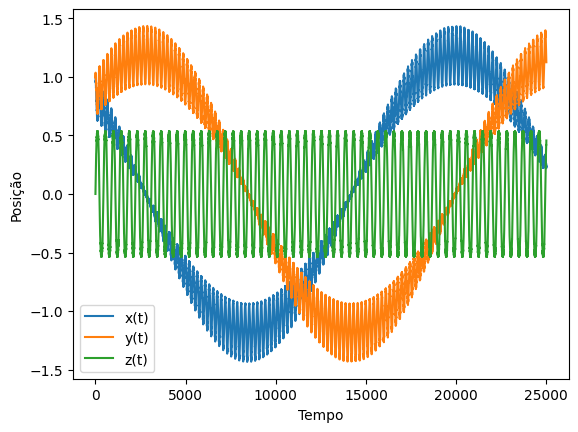

In [25]:
# Posição x Tempo:
plt.plot(tempo, solucao[:, 0], label='x(t)')
plt.plot(tempo, solucao[:, 1], label='y(t)')
plt.plot(tempo, solucao[:, 2], label='z(t)')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.legend()
plt.show()

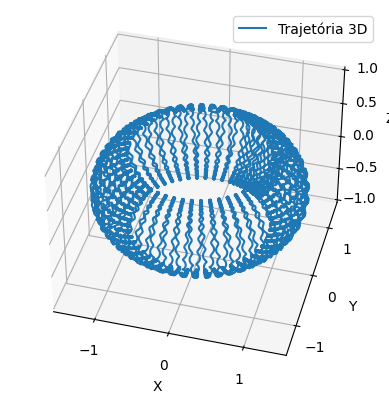

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(solucao[:, 0], solucao[:, 1], solucao[:, 2], label='Trajetória 3D')

# Defindo os limites dos eixos desejados para os eixos x, y e z:

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1, 1)

# Definindo as grades desejadas para os eixos x, y e z:
ax.set_xticks(np.arange(-1, 2, 1))
ax.set_yticks(np.arange(-1, 2, 1))
ax.set_zticks(np.arange(-1, 1.5, 0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Ajustando a posição do gráfico:
ax.view_init(elev=40, azim=-75)

plt.show()

Encontrando as velocidades e acelerações através das funções:


In [27]:
velocidade_em_x = velocidades_x(tpontos, xpontos)
velocidade_em_y= velocidades_y(tpontos, ypontos)
velocidade_em_z = velocidades_z(tpontos, zpontos)
aceleracao_em_x = aceleracao_x(tpontos, velocidade_em_x)
aceleracao_em_y = aceleracao_y(tpontos, velocidade_em_y)
aceleracao_em_z = aceleracao_z(tpontos, velocidade_em_z)

Plotando os gráficos das velocidades e acelerações:

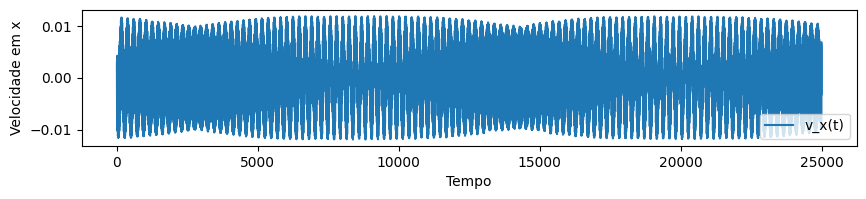

In [28]:
# Velocidade em X x Tempo:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(velocidade_em_x, label='v_x(t)')
plt.xlabel('Tempo')
plt.ylabel('Velocidade em x')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

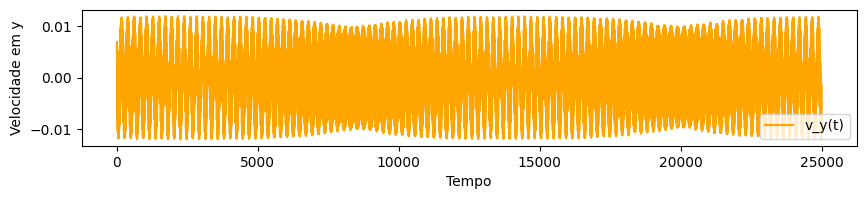

In [29]:
# Velocidade em Y x Tempo:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 2)
plt.plot(velocidade_em_y, label='v_y(t)', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Velocidade em y')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

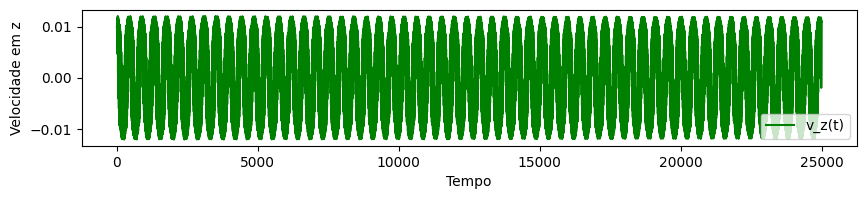

In [30]:
# Velocidade em Z x Tempo:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 3)
plt.plot(velocidade_em_z, label='v_z(t)', color='green')
plt.xlabel('Tempo')
plt.ylabel('Velocidade em z')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

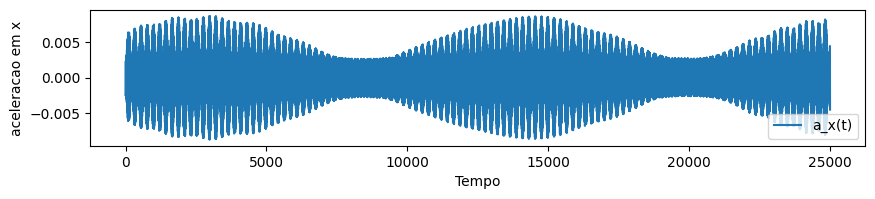

In [31]:
# Aceleração em X x Tempo:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(aceleracao_em_x, label='a_x(t)')
plt.xlabel('Tempo')
plt.ylabel('aceleracao em x')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

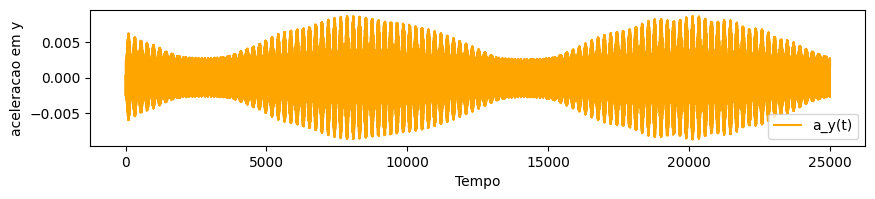

In [32]:
# Aceleração em Y x Tempo:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 2)
plt.plot(aceleracao_em_y, label='a_y(t)', color='orange')
plt.xlabel('Tempo')
plt.ylabel('aceleracao em y')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

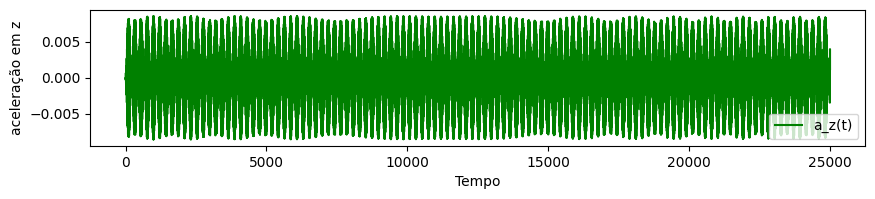

In [33]:
# Aceleração em Z x Tempo:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 3)
plt.plot(aceleracao_em_z, label='a_z(t)', color='green')
plt.xlabel('Tempo')
plt.ylabel('aceleração em z')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

Definindo novas condições iniciais:

In [37]:
# Condições iniciais 0:
x0, y0, z0 = 1.0, 1.0, 0.0
xp0, yp0, zp0 = 0.05, 0.05, 0.1
conds_iniciais0 = [x0, y0, z0, xp0, yp0, zp0]

# Condições iniciais 1:
x01, y01, z01 = 0.5, 0.5, 0.0
xp01, yp01, zp01 = 0.015, 0.015, 0.1
conds_iniciais1 = [x01, y01, z01, xp01, yp01, zp01]

# Condições iniciais 2:
x02, y02, z02 = 0.1, 0.1, 0.0
xp02, yp02, zp02 = 0.05, 0.05, 0.1
conds_iniciais2 = [x02, y02, z02, xp02, yp02, zp02]

# Parâmetros:
omega = 1.0
tempo = np.linspace(0, 1700, 1700)

# Variaveis condicções iniciais 0:
x0pontos = []
y0pontos = []
z0pontos = []
t0pontos = []

# Variaveis condicções iniciais 1:
x1pontos = []
y1pontos = []
z1pontos = []

# Variaveis condicções iniciais 2:
x2pontos = []
y2pontos = []
z2pontos = []

Resolvendo as EDOs com as novas condições:

In [38]:
solucao0 = odeint(derivadas, conds_iniciais0, tempo, args=(omega,))
solucao1 = odeint(derivadas, conds_iniciais1, tempo, args=(omega,))
solucao2 = odeint(derivadas, conds_iniciais2, tempo, args=(omega,))

for t, posicoes in zip(tempo, solucao0):
    x, y, z, xp, yp, zp = posicoes
    x0pontos.append(x)
    y0pontos.append(y)
    z0pontos.append(z)
    tpontos.append(t)

for t, posicoes in zip(tempo, solucao1):
    x, y, z, xp, yp, zp = posicoes
    x1pontos.append(x)
    y1pontos.append(y)
    z1pontos.append(z)
    tpontos.append(t)

for t, posicoes in zip(tempo, solucao2):
    x, y, z, xp, yp, zp = posicoes
    x2pontos.append(x)
    y2pontos.append(y)
    z2pontos.append(z)
    tpontos.append(t)


Plotando o gráfico:

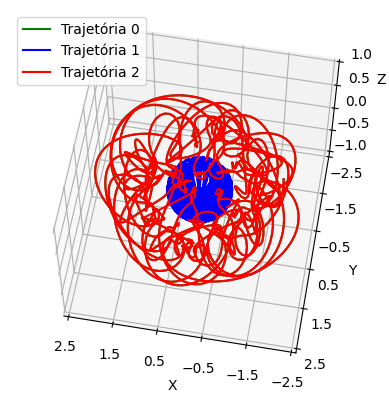

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(solucao0[:, 0], solucao0[:, 1], solucao0[:, 2], label='Trajetória 0', color='green')
ax.plot(solucao1[:, 0], solucao1[:, 1], solucao1[:, 2], label='Trajetória 1', color='blue')
ax.plot(solucao2[:, 0], solucao2[:, 1], solucao2[:, 2], label='Trajetória 2', color='red')

# Definindo os limites desejados para os eixos x, y e z
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-1, 1)

# Definindo as marcas (ticks) desejadas para os eixos x, y e z
ax.set_xticks(np.arange(-2.5, 3, 1))
ax.set_yticks(np.arange(-2.5, 3, 1))
ax.set_zticks(np.arange(-1, 1.5, 0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Movendo a legenda:
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Ajustando a posição do gráfico:
ax.view_init(elev=60, azim=100)

plt.show()
